In [2]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [3]:
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [4]:
base_color = "#8ACE00"
brat_color = sns.dark_palette(base_color, n_colors=2)[1]

#colors for sentiment:
negative_shade = sns.dark_palette(base_color, n_colors=3)[0]
neutral_shade = sns.light_palette(base_color, n_colors=5)[1]
positive_shade =  sns.dark_palette(base_color, n_colors=3)[2]

In [5]:
#data imports 
filename = "../results/YouTube-with-sentiments_24-11-2024_15h52.csv"
youtube = pd.read_csv(filename)
#youtube.head()

filename = "../results/TikTok-with-sentiments_24-11-2024_15h12.csv"
tiktok = pd.read_csv(filename)

filename = "../results/Reddit-with-sentiments_24-11-2024_15h12.csv"
reddit = pd.read_csv(filename)

In [6]:
def byebyelestrucsinutiles(x):
    return x[:10]

youtube["Timestamp"] = youtube["Timestamp"].apply(byebyelestrucsinutiles)

je commence en regroupant les commentaires dans un seul dataset:
- texte
- date

differencier par reseaux sociaux: pourquoi pas, mais a voir. Reddit y'a pas time of publication :-)

In [7]:
youtube_small = youtube[["Comment", "Timestamp"]]
youtube_small.rename(columns={"Comment":"Comment", "Timestamp":"Time"}, inplace=True)
youtube_small["media"] = ["youtube" for _ in range(youtube.shape[0])]

tiktok_small = tiktok[["Comment Text", "Time"]]
tiktok_small.rename(columns={"Comment Text":"Comment", "Time":"Time"}, inplace=True)
tiktok_small["media"] = ["tiktok" for _ in range(tiktok.shape[0])]

tiktok.dropna(axis=0, subset="Time", inplace=True) # there is one nan that need to be removed


/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15729/2428819291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_small.rename(columns={"Comment":"Comment", "Timestamp":"Time"}, inplace=True)
/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15729/2428819291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_small["media"] = ["youtube" for _ in range(youtube.shape[0])]
/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15729/2428819291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [8]:
tiktok_small.head()

,Comment,Time,media
0,Chartreuse pls 😭😭😭,2024-07-24,tiktok
1,watching them explain. I can’t breathe.,2024-07-23,tiktok
2,Our gen z correspondent 😭😭😭😭,2024-07-23,tiktok
3,THEY PRINTED IT OUT😭😭😭,2024-07-23,tiktok
4,"Me, an elder millennial, hearing “she’s brat” ...",2024-07-23,tiktok


In [9]:
all_comments = pd.concat([youtube_small, tiktok_small], axis = 0)
all_comments["Time"] = pd.to_datetime(all_comments['Time'], format='%Y-%m-%d')

In [10]:
all_comments

,Comment,Time,media
0,Dufus-in-chief,2024-11-04,youtube
1,I thought the liberals hate the rich? Lmfao th...,2024-11-04,youtube
2,Who gives af,2024-11-04,youtube
3,No babe we don’t need your opinion babe. Trump...,2024-11-04,youtube
4,Yeah this will sway the vote,2024-11-02,youtube
...,...,...,...
18133,Aesthetic is not a gen Z word 😭 are they OK,2024-07-23,tiktok
18134,HARRIS,2024-07-23,tiktok
18135,So happy you came into my life sir God bless y...,2024-07-23,tiktok
18136,that was some of the best entertainment I've s...,2024-07-23,tiktok


Maintenant, il faut compter le nombre de commentaires et afficher ca !

# Tracé du nombre de commentaires contenant Kamala ET Brat

In [11]:
all_comments['contains_kamala'] = all_comments['Comment'].str.contains(r"(?i)(?=.*(kamala|Harris))", case = False, regex=True) #4932


#regex pattern to have [("kamala" OR "Harris") AND "brat"]: r"(?i)(?=.*(kamala|Harris))(?=.*brat)"
#all_comments['contains_kamala_and_brat'] = all_comments['Comment'].str.contains(r"(?i)(?=.*(kamala|Harris))(?=.*brat)", case = False, regex=True) #304


/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15729/3491555160.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  all_comments['contains_kamala'] = all_comments['Comment'].str.contains(r"(?i)(?=.*(kamala|Harris))", case = False, regex=True) #4932


In [12]:
#all_comments[all_comments['contains_kamala']]

In [13]:
grouped_by_posting_date = all_comments.groupby('Time', as_index = False).agg(nb_kamala = ("contains_kamala", 'sum'), total_comments_nb= ("Comment", 'count')).sort_values("Time")
grouped_by_posting_date[["total_comments_nb"]]

,total_comments_nb
0,3
1,65
2,87
3,54
4,170
...,...
129,27
130,7
131,8
132,1


In [14]:
grouped_by_posting_date["nb_kamala_percentage"] = grouped_by_posting_date["nb_kamala"] / grouped_by_posting_date["total_comments_nb"]
grouped_by_posting_date["Time"] = pd.to_datetime(grouped_by_posting_date['Time'], format='%Y-%m-%d')
grouped_by_posting_date

,Time,nb_kamala,total_comments_nb,nb_kamala_percentage
0,2024-06-30,0,3,0.000000
1,2024-07-01,5,65,0.076923
2,2024-07-02,2,87,0.022989
3,2024-07-03,1,54,0.018519
4,2024-07-04,28,170,0.164706
...,...,...,...,...
129,2024-11-06,5,27,0.185185
130,2024-11-07,2,7,0.285714
131,2024-11-08,1,8,0.125000
132,2024-11-09,0,1,0.000000


<Axes: xlabel='Time', ylabel='nb_kamala'>

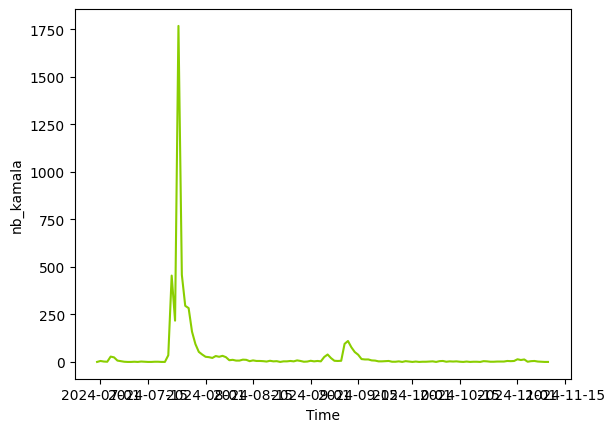

In [21]:
sns.lineplot(
    data=grouped_by_posting_date, 
    x="Time", 
    y="nb_kamala",
    color=base_color) #could also add hue='sentiment'

<Axes: xlabel='Time', ylabel='nb_kamala_percentage'>

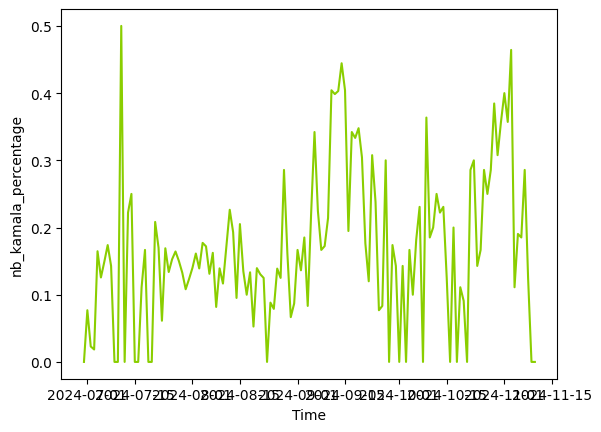

In [16]:
sns.lineplot(
    data=grouped_by_posting_date, 
    x="Time", 
    y="nb_kamala_percentage",
    color=base_color) #could also add hue='sentiment'

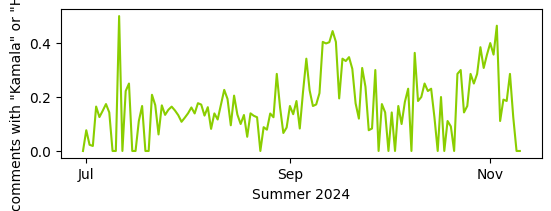

In [19]:
fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')

ax.plot(grouped_by_posting_date[["Time"]], grouped_by_posting_date[["nb_kamala_percentage"]],color=base_color)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=np.arange(1, 13, 2)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlabel('Summer 2024')
ax.set_ylabel('comments with "Kamala" or "Harris"')

qq

regardons la date moyenne des posts:



# Tracé du nombre de commentaires contenant mots politiques (ET Kamala, peut-être ?)